In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/kaggle/input/airlines-flights-data/airlines_flights_data.csv")
df.head(5)


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
#Q.1. What are the airlines in the dataset, accompanied by their frequencies?
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


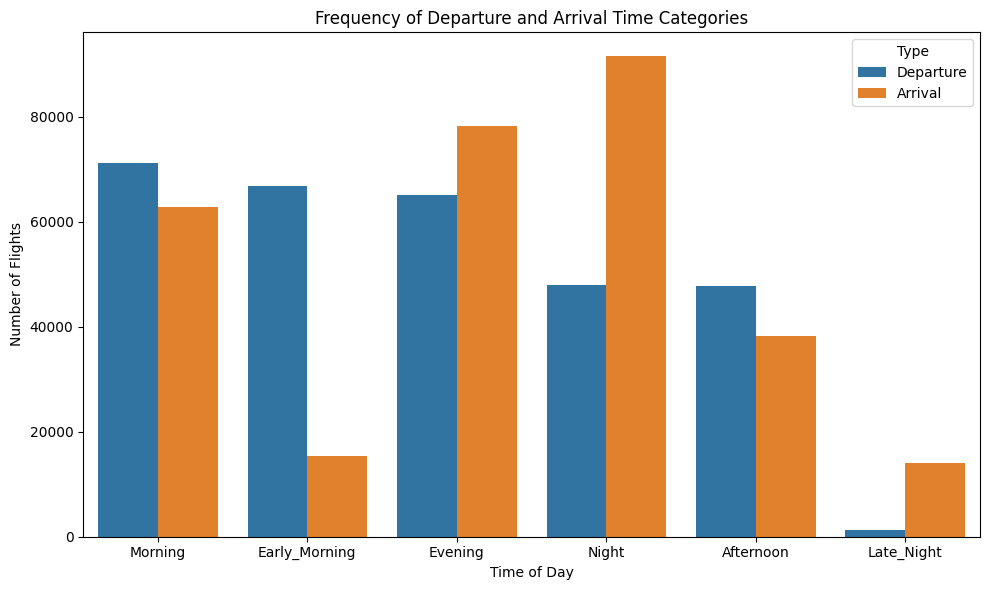

In [5]:
#Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.
departure_counts = df['departure_time'].value_counts().reset_index()
departure_counts.columns = ['Time of Day', 'Count']
departure_counts['Type'] = 'Departure'
arrival_counts = df['arrival_time'].value_counts().reset_index()
arrival_counts.columns = ['Time of Day', 'Count']
arrival_counts['Type'] = 'Arrival'
combined = pd.concat([departure_counts, arrival_counts])
plt.figure(figsize=(10, 6))
sns.barplot(data=combined, x='Time of Day', y='Count', hue='Type')
plt.title('Frequency of Departure and Arrival Time Categories')
plt.xlabel('Time of Day')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

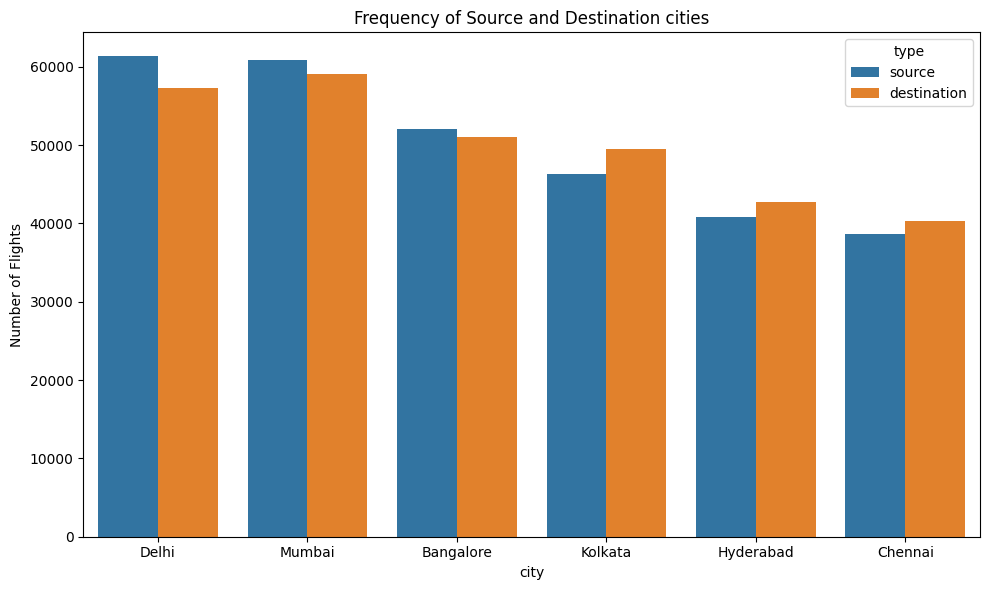

In [6]:
#Q.3. Show Bar Graphs representing the Source City & Destination City.

source= df["source_city"].value_counts().reset_index()
source.columns= ["city", "count"]
source["type"]= "source"
destination= df["destination_city"].value_counts().reset_index()
destination.columns= ["city", "count"]
destination["type"]= "destination"
combine= pd.concat([source,destination])
plt.figure(figsize=(10, 6))
sns.barplot(data=combine, x='city', y='count', hue='type')
plt.title('Frequency of Source and Destination cities')
plt.xlabel('city')
plt.ylabel('Number of Flights')
plt.tight_layout()
plt.show()

In [7]:
#Q.4. Does price varies with airlines ?
airline_prices = df.groupby('airline')['price'].describe()
print(airline_prices)


              count          mean           std     min     25%      50%  \
airline                                                                    
AirAsia     16098.0   4091.072742   2824.055172  1105.0  2361.0   3276.0   
Air_India   80892.0  23507.019112  20905.116909  1526.0  5623.0  11520.0   
GO_FIRST    23173.0   5652.007595   2513.865560  1105.0  4205.0   5336.0   
Indigo      43120.0   5324.216303   3268.894831  1105.0  3219.0   4453.0   
SpiceJet     9011.0   6179.278881   2999.630406  1106.0  4197.0   5654.0   
Vistara    127859.0  30396.536302  25637.159445  1714.0  6412.0  15543.0   

               75%       max  
airline                       
AirAsia     4589.0   31917.0  
Air_India  45693.0   90970.0  
GO_FIRST    6324.0   32803.0  
Indigo      6489.0   31952.0  
SpiceJet    7412.0   34158.0  
Vistara    55377.0  123071.0  


In [8]:
import scipy.stats as stats
groups = [group['price'].values for _, group in df.groupby('airline')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}") 

F-statistic: 17194.40, p-value: 0.0000


In [9]:
#Q.5. Does ticket price change based on the departure time and arrival time?

grouped = df.groupby(['departure_time', 'arrival_time'])['price'].mean().unstack()
print(grouped)


arrival_time       Afternoon  Early_Morning       Evening    Late_Night  \
departure_time                                                            
Afternoon       14741.746011   21159.511401  15548.836651  10811.615662   
Early_Morning   16564.731082    9540.191523  24804.077441  29638.037500   
Evening         25569.672277   18175.929529  24612.547643   8547.029235   
Late_Night      18520.684932    4548.700599  21217.106383   4288.291971   
Morning         13271.433547   22625.786578  21636.529952  23624.505755   
Night           28115.362126   12075.785461  31425.824194   6590.831766   

arrival_time         Morning         Night  
departure_time                              
Afternoon       26056.580994  19097.798757  
Early_Morning   12299.838792  25792.007764  
Evening         28326.216482  15641.705242  
Late_Night       7104.374684  29439.811321  
Morning         17548.738563  26827.897551  
Night           25573.642137  17817.956009  


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(departure_time) + C(arrival_time) + C(departure_time):C(arrival_time)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                         sum_sq        df            F  PR(>F)
C(departure_time)                  9.034778e+11       5.0   376.737536     0.0
C(arrival_time)                    2.652889e+12       5.0  1106.217388     0.0
C(departure_time):C(arrival_time)  7.218134e+12      25.0   601.972074     0.0
Residual                           1.439459e+14  300117.0          NaN     NaN


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


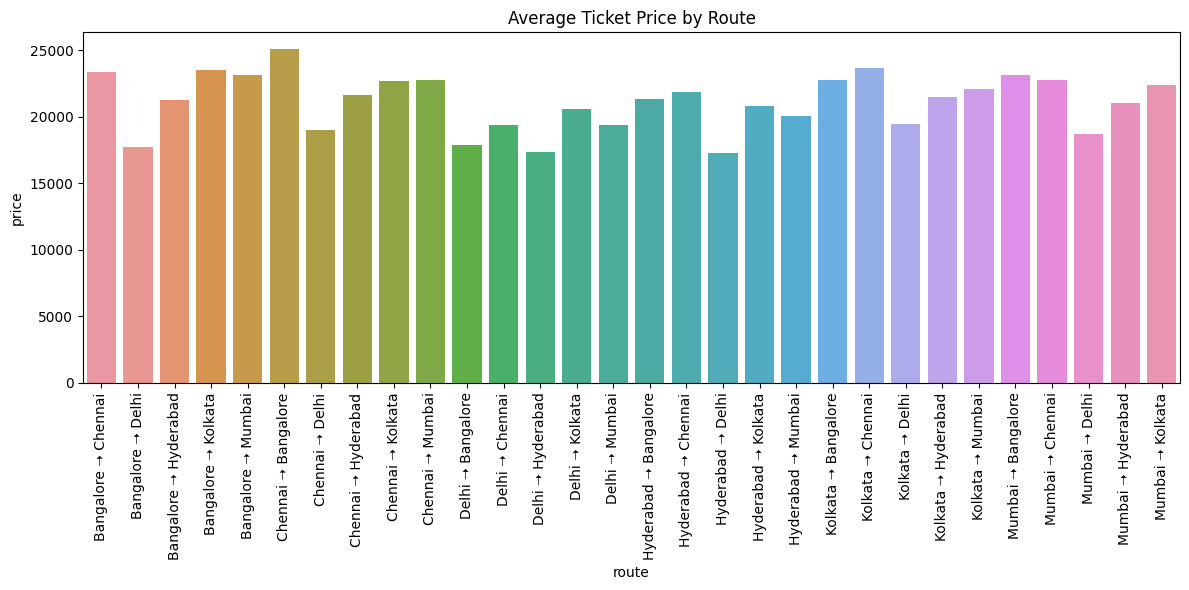

In [11]:
#Q.6. How the price changes with change in Source and Destination?

df['route'] = df['source_city'] + " ➝ " + df['destination_city']

# Group and plot
avg_price_by_route = df.groupby('route')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_by_route, x='route', y='price')
plt.title('Average Ticket Price by Route')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [12]:
last_min= [df['days_left']<=2]
df['booking_type'] = df['days_left'].apply(lambda x: 'Last-Minute' if x <= 2 else 'Normal')
avg_prices = df.groupby('booking_type')['price'].mean()
print(avg_prices)

booking_type
Last-Minute    27421.169326
Normal         20757.498484
Name: price, dtype: float64


In [13]:
#Q.8. How does the ticket price vary between Economy and Business class?
class_type= df.groupby ("class")['price'].mean()
class_type

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

In [14]:
filtered_df = df[
    (df['airline'] == 'Vistara') &
    (df['route'] == 'Delhi➝Hyderabad') &
    (df['class'] == 'Business')
]


average_price = filtered_df['price'].mean()
average_price

nan